###The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
import pandas as pd

# Define the file path
file_path ="bank-full.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path, sep=';')

# Display the first few rows of the DataFrame
print(df.head(5))


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Axes: >

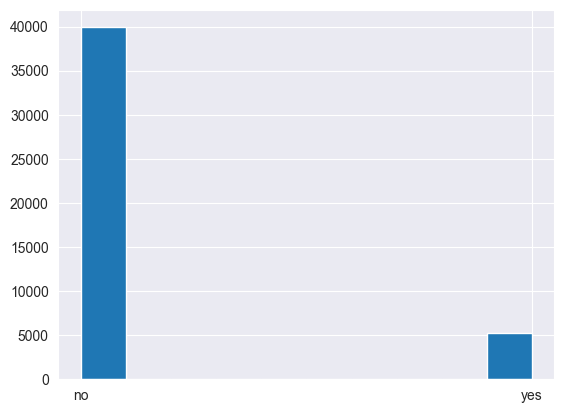

In [7]:
df["y"].hist()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column data type is object (string)
    if df[col].dtype == 'object':
        # Use label encoding to convert the column to numeric
        df[col] = label_encoder.fit_transform(df[col])

# All object columns have been converted to numeric using label encoding


In [9]:
print(df.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


<Axes: >

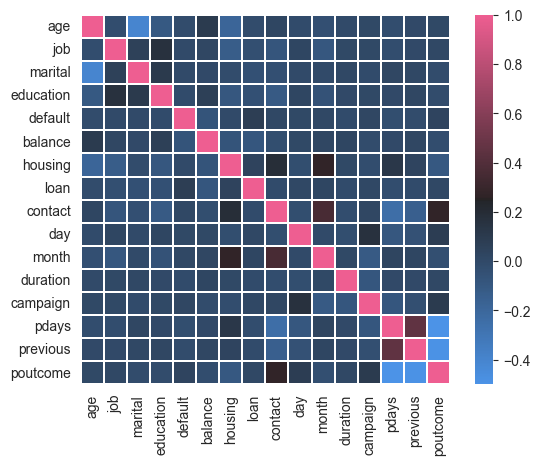

In [10]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [11]:

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


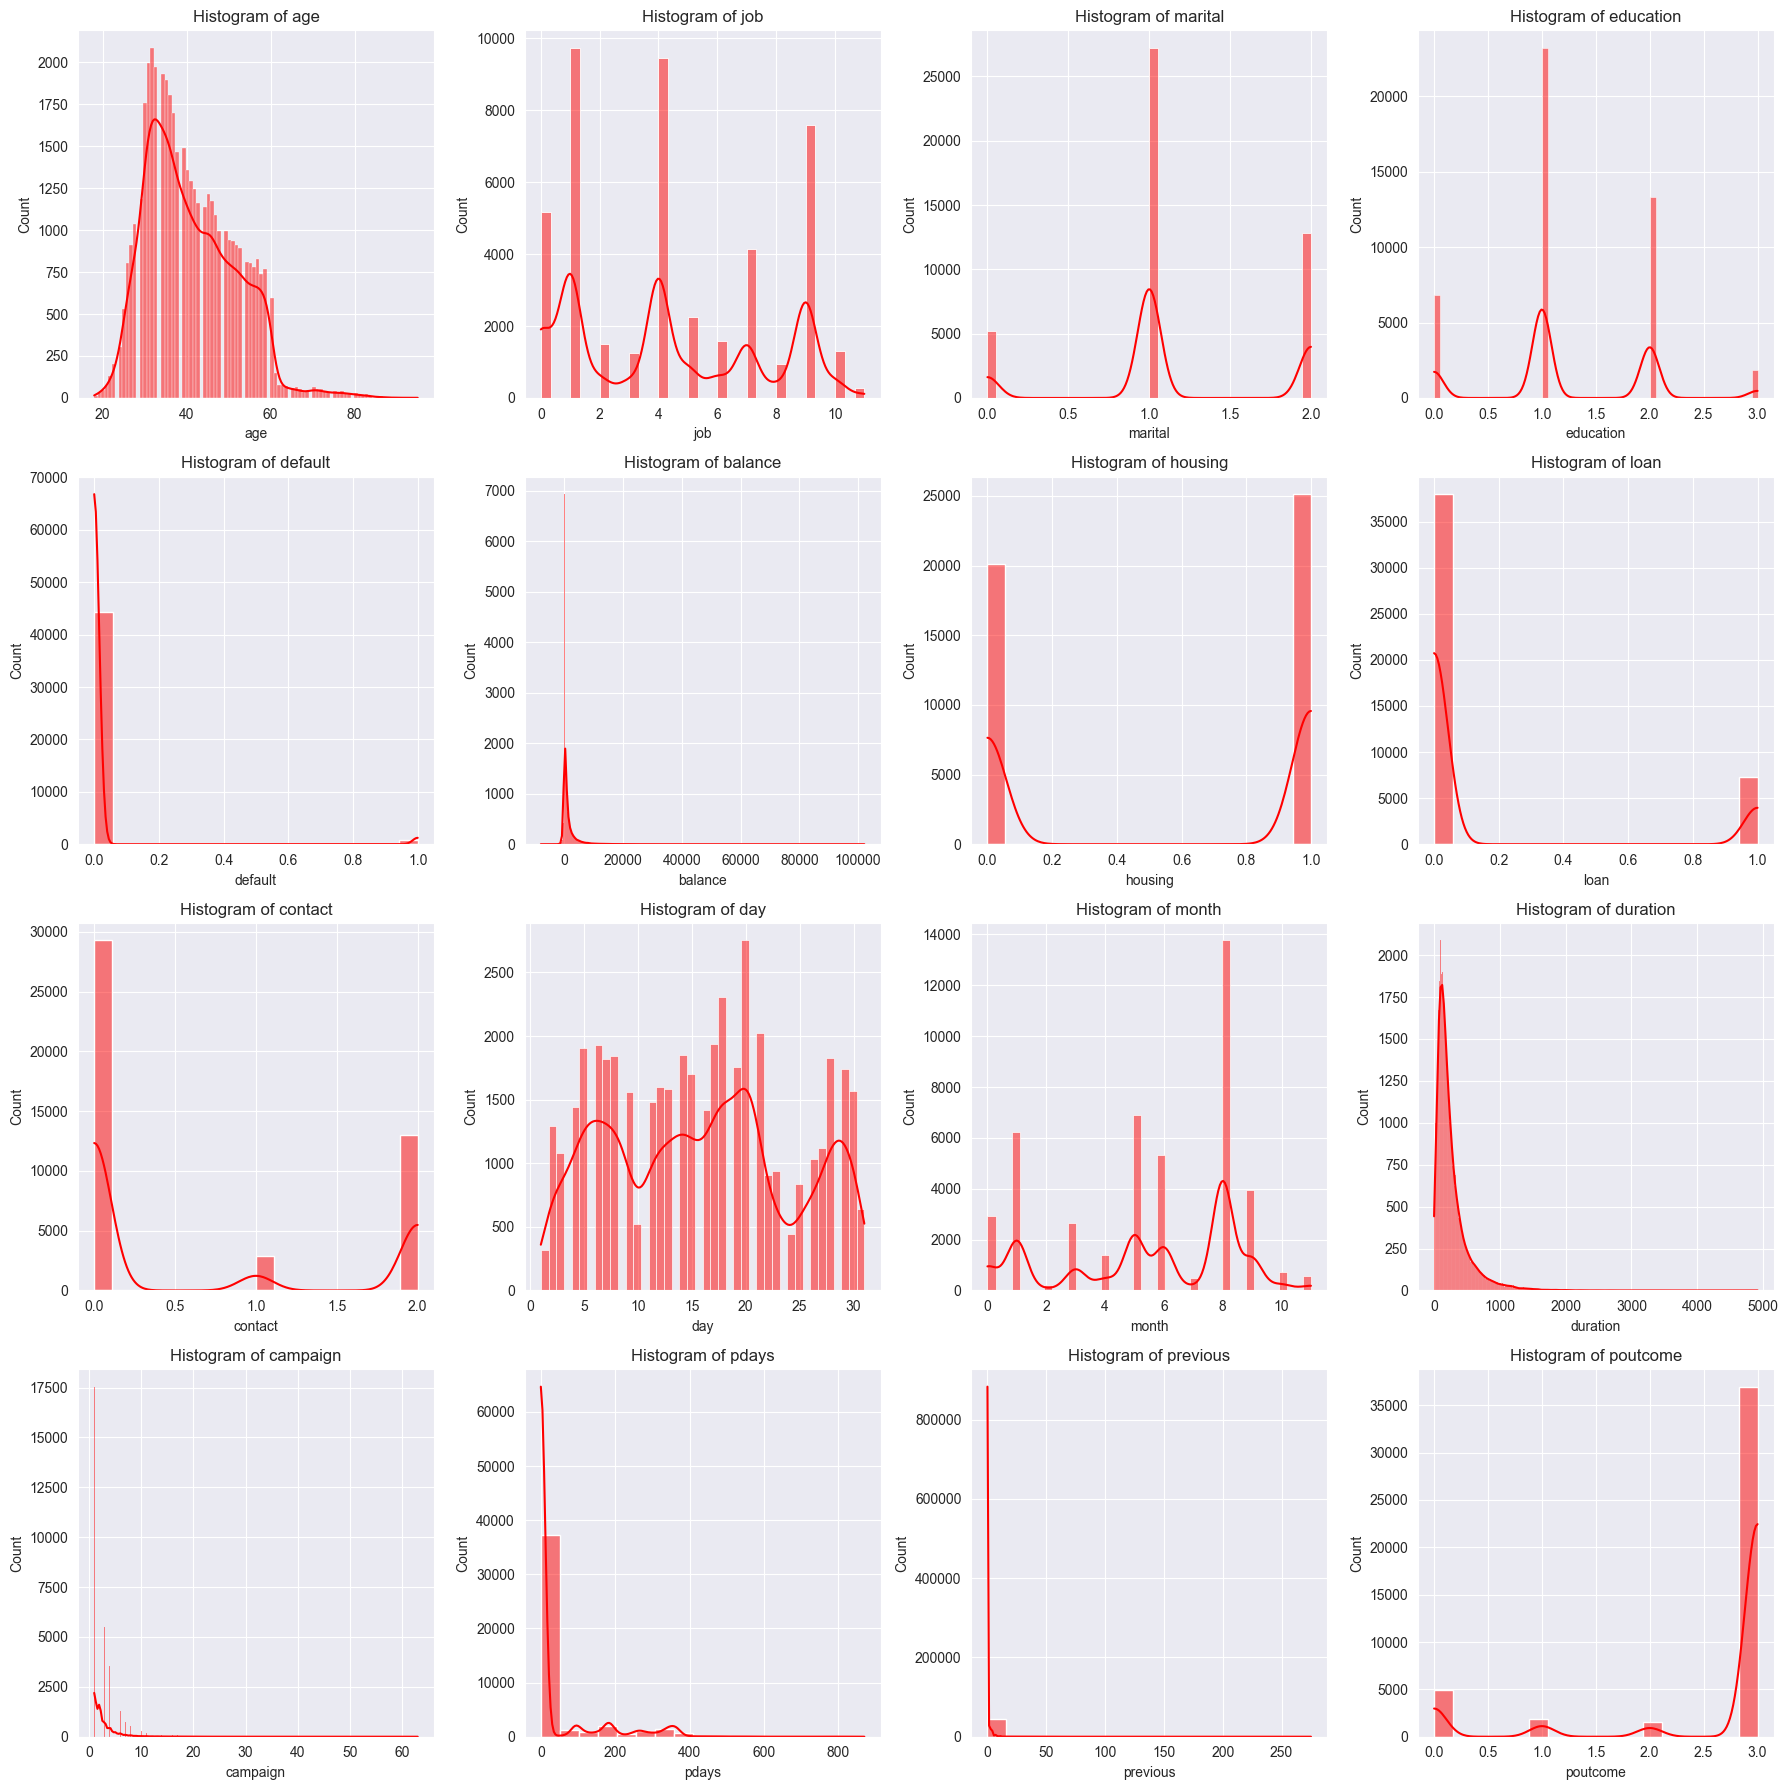

In [12]:

# Define the columns for which you want to create histograms
columns_to_plot = ['age', 'job', 'marital', 'education', 'default', 
                   'balance', 'housing', 'loan', 'contact', 'day', 
                   'month', 'duration', 'campaign', 'pdays', 
                   'previous', 'poutcome']

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(18, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, column in enumerate(columns_to_plot):
    sns.histplot(df, ax=axes[i], x=column, kde=True, color='r')
    axes[i].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()
plt.show()



In [13]:
## Test Gaussian model

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [15]:
# Define X (features) and Y (target)
X = df.drop(columns=['y','pdays'])  
y = df['y']  


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 5)

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [18]:
gnb.fit(X_train, y_train)


GaussianNB()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have test data X_test and corresponding labels y_test
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8776954550481035
Precision: 0.4684873949579832
Recall: 0.42638623326959846
F1-score: 0.44644644644644643
Confusion Matrix:
[[7491  506]
 [ 600  446]]


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now, all values in X_train_scaled and X_test_scaled should be non-negative


In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()


In [22]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()


In [23]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have test data X_test and corresponding labels y_test
y_pred_bnb = bnb.predict(X_test)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("Accuracy for BernoulliNB:", accuracy_bnb)

# Calculate precision
precision_bnb = precision_score(y_test, y_pred_bnb)
print("Precision for BernoulliNB:", precision_bnb)

# Calculate recall
recall_bnb = recall_score(y_test, y_pred_bnb)
print("Recall for BernoulliNB:", recall_bnb)

# Calculate F1-score
f1_bnb = f1_score(y_test, y_pred_bnb)
print("F1-score for BernoulliNB:", f1_bnb)

# Calculate confusion matrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
print("Confusion Matrix for BernoulliNB:")
print(conf_matrix_bnb)
    

Accuracy for BernoulliNB: 0.883777507464337
Precision for BernoulliNB: 0.4418604651162791
Recall for BernoulliNB: 0.018164435946462717
F1-score for BernoulliNB: 0.03489439853076217
Confusion Matrix for BernoulliNB:
[[7973   24]
 [1027   19]]
